# CNN 기반 MNIST 이미지 분류

## MNIST 다운로드 (keras Dataset)

In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


**이미지 전처리**

In [ ]:
# ConvNet 4차원 입력 -> Sample이 1이여도 (1,28,28,1) 입력
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

## CNN 모델 생성

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Conv 입력 차원 4차원 = (None, 세로, 가로, 채널)
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)  # MNIST 10개 숫자 분류

# CNN 모델 생성
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 128)         7385

## 모델 학습

**Checkpoint과 EarlyStopping 기법 활용**

In [ ]:
callbacks = [

    # Check Point -> 최고 성능 모델 저장
    keras.callbacks.ModelCheckpoint(
        filepath="MNIST.keras",
        save_best_only=True,
        monitor="val_loss"),

     # Early Stopping -> 조기 종료
     keras.callbacks.EarlyStopping(
        monitor = "val_accuracy",
        patience = 4
    )
]

In [ ]:
# Compile
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy", # softmax Loss
    metrics=["accuracy"])

# 학습
history = model.fit(train_images, train_labels,
                    epochs=20, batch_size=64,
                    validation_split=0.2, callbacks=callbacks)

**학습 그래프**

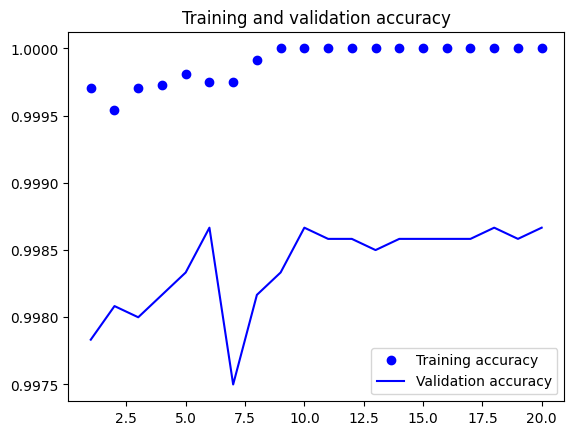

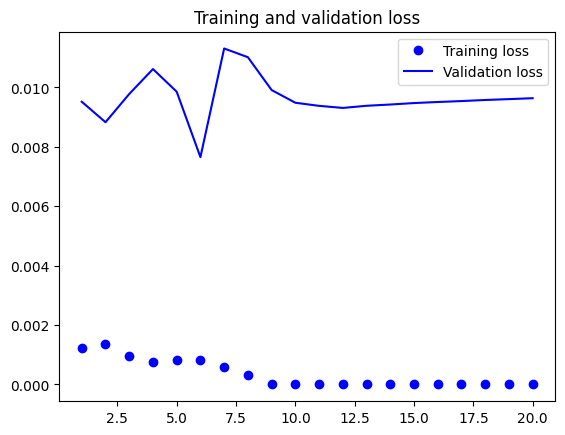

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## 성능 측정

In [ ]:
model = keras.models.load_model("MNIST.keras")
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0502 - accuracy: 0.9936
테스트 정확도: 0.994


## 새로운 이미지 예측

**10개의 이미지 중 첫 번째 이미지 예측**

In [ ]:
test_digists = test_images[0:10]
predicition = model.predict(test_digists)   # (10, 10)

# 가장 높은 확률 Index
print(f"예측 값: {predicition[0].argmax()}")

# 실제 정답
print(f"정답 값: {test_labels[0]}")

1/1 [==============================] - 0s 65ms/step
예측 값: 7
정답 값: 7
